# Data Mining
### Project for Data Mining, Spring 2019


Contributors
------------

* [Sofia Kostakonti](https://github.com/SofiaKstk/ "Sofia Kostakonti") : 1115201500080
* [Ioannis Pelekoudas](https://github.com/pelekoudasq/ "Ioannis Pelekoudas") : 1115201500128

#### First Part - Clean Data

Αφαιρούμε τα σύμβολα, όπως hashtags, emoticons, emojis, τα links και τα stopwords από το training set.

In [69]:
import pandas as pd
import numpy as np
from emoji import UNICODE_EMOJI
import re
#nltk.download('all')

DataLocation = r'./twitter_data/test2017.tsv'

df = pd.read_csv(DataLocation, sep='\t', header=None, usecols=[3])
sd = df
sd.columns = ["tweets"]

from nltk.corpus import stopwords
stop = stopwords.words("english")
sd['clean'] = sd['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
sd['clean'] = sd['clean'].apply(lambda x: ' '.join([re.sub(r'^@.*', '<user>', word) for word in x.split()]))
sd['clean'] = sd['clean'].apply(lambda x: ' '.join([re.sub(r'^#.*', '<hashtag>', word) for word in x.split()]))
sd['clean'] = sd['clean'].apply(lambda x: ' '.join([re.sub(r'[0-9]+', '<number>', word) for word in x.split()]))
sd['clean'] = sd['clean'].apply(lambda x: ' '.join([re.sub(r'(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', '<url>', word) for word in x.split()]))
# sd['clean'] = sd['clean'].apply(lambda x: ' '.join([for word in x.split(): '<emoji>' if word in UNICODE_EMOJI else word]))



#lowercase everything
sd = sd.apply(lambda x: x.astype(str).str.lower())

#remove hashtags
#sd = sd.tweets.str.replace("#","")
sd

,tweets,clean
0,#arianagrande ari by ariana grande 80% full #s...,<hashtag> ari by ariana grande <number>% full ...
1,ariana grande kiis fm yours truly cd listening...,ariana grande kiis fm yours truly cd listening...
2,ariana grande white house easter egg roll in w...,ariana grande white house easter egg roll wash...
3,#cd #musics ariana grande sweet like candy 3.4...,<hashtag> <hashtag> ariana grande sweet like c...
4,side to side @arianagrande #sidetoside #aria...,side to side <user> <hashtag> <hashtag> <hasht...
5,hairspray live! previews at the macy's thanksg...,hairspray live! previews macy's thanksgiving d...
6,#lindsaylohan is 'feeling thankful' after blas...,<hashtag> is 'feeling thankful' after blasting...
7,i hate her but... i love her songs dammit ._.#...,i hate <url> i love songs dammit ._.#arianagrande
8,ariana grande right there ft. big sean # #ar...,ariana grande right there ft. big sean <hashta...
9,which one would you prefer to listen to for a ...,one would prefer listen whole day? ; could nev...


#### Second Part - Tokenization

Διαχωρισμός των λέξεων.

In [70]:
import nltk

tokens = nltk.word_tokenize(' '.join(sd['clean']))
tokens2 = ' '.join(sd['clean']).split()
tokens2

['<hashtag>',
 'ari',
 'by',
 'ariana',
 'grande',
 '<number>%',
 'full',
 '<hashtag>',
 '<hashtag>',
 'ariana',
 'grande',
 'kiis',
 'fm',
 'yours',
 'truly',
 'cd',
 'listening',
 'party',
 'burbank',
 '<hashtag>',
 'ariana',
 'grande',
 'white',
 'house',
 'easter',
 'egg',
 'roll',
 'washington',
 '<hashtag>',
 '<hashtag>',
 '<hashtag>',
 'ariana',
 'grande',
 'sweet',
 'like',
 'candy',
 '<number>.<number>',
 'oz',
 '<number>',
 'ml',
 'sealed',
 'in',
 'box',
 '<number>%',
 'authenic',
 'new',
 'side',
 'to',
 'side',
 '<user>',
 '<hashtag>',
 '<hashtag>',
 '<hashtag>',
 '<hashtag>',
 '<hashtag>',
 '<hashtag>',
 'hairspray',
 'live!',
 'previews',
 "macy's",
 'thanksgiving',
 'day',
 'parade!',
 '<hashtag>',
 '<hashtag>',
 '<hashtag>',
 'is',
 "'feeling",
 "thankful'",
 'after',
 'blasting',
 '<hashtag>',
 'for',
 'wearing',
 "'#toomuch'",
 'i',
 'hate',
 '<url>',
 'i',
 'love',
 'songs',
 'dammit',
 '._.#arianagrande',
 'ariana',
 'grande',
 'right',
 'there',
 'ft.',
 'big',
 '

(-0.5, 1599.5, 799.5, -0.5)

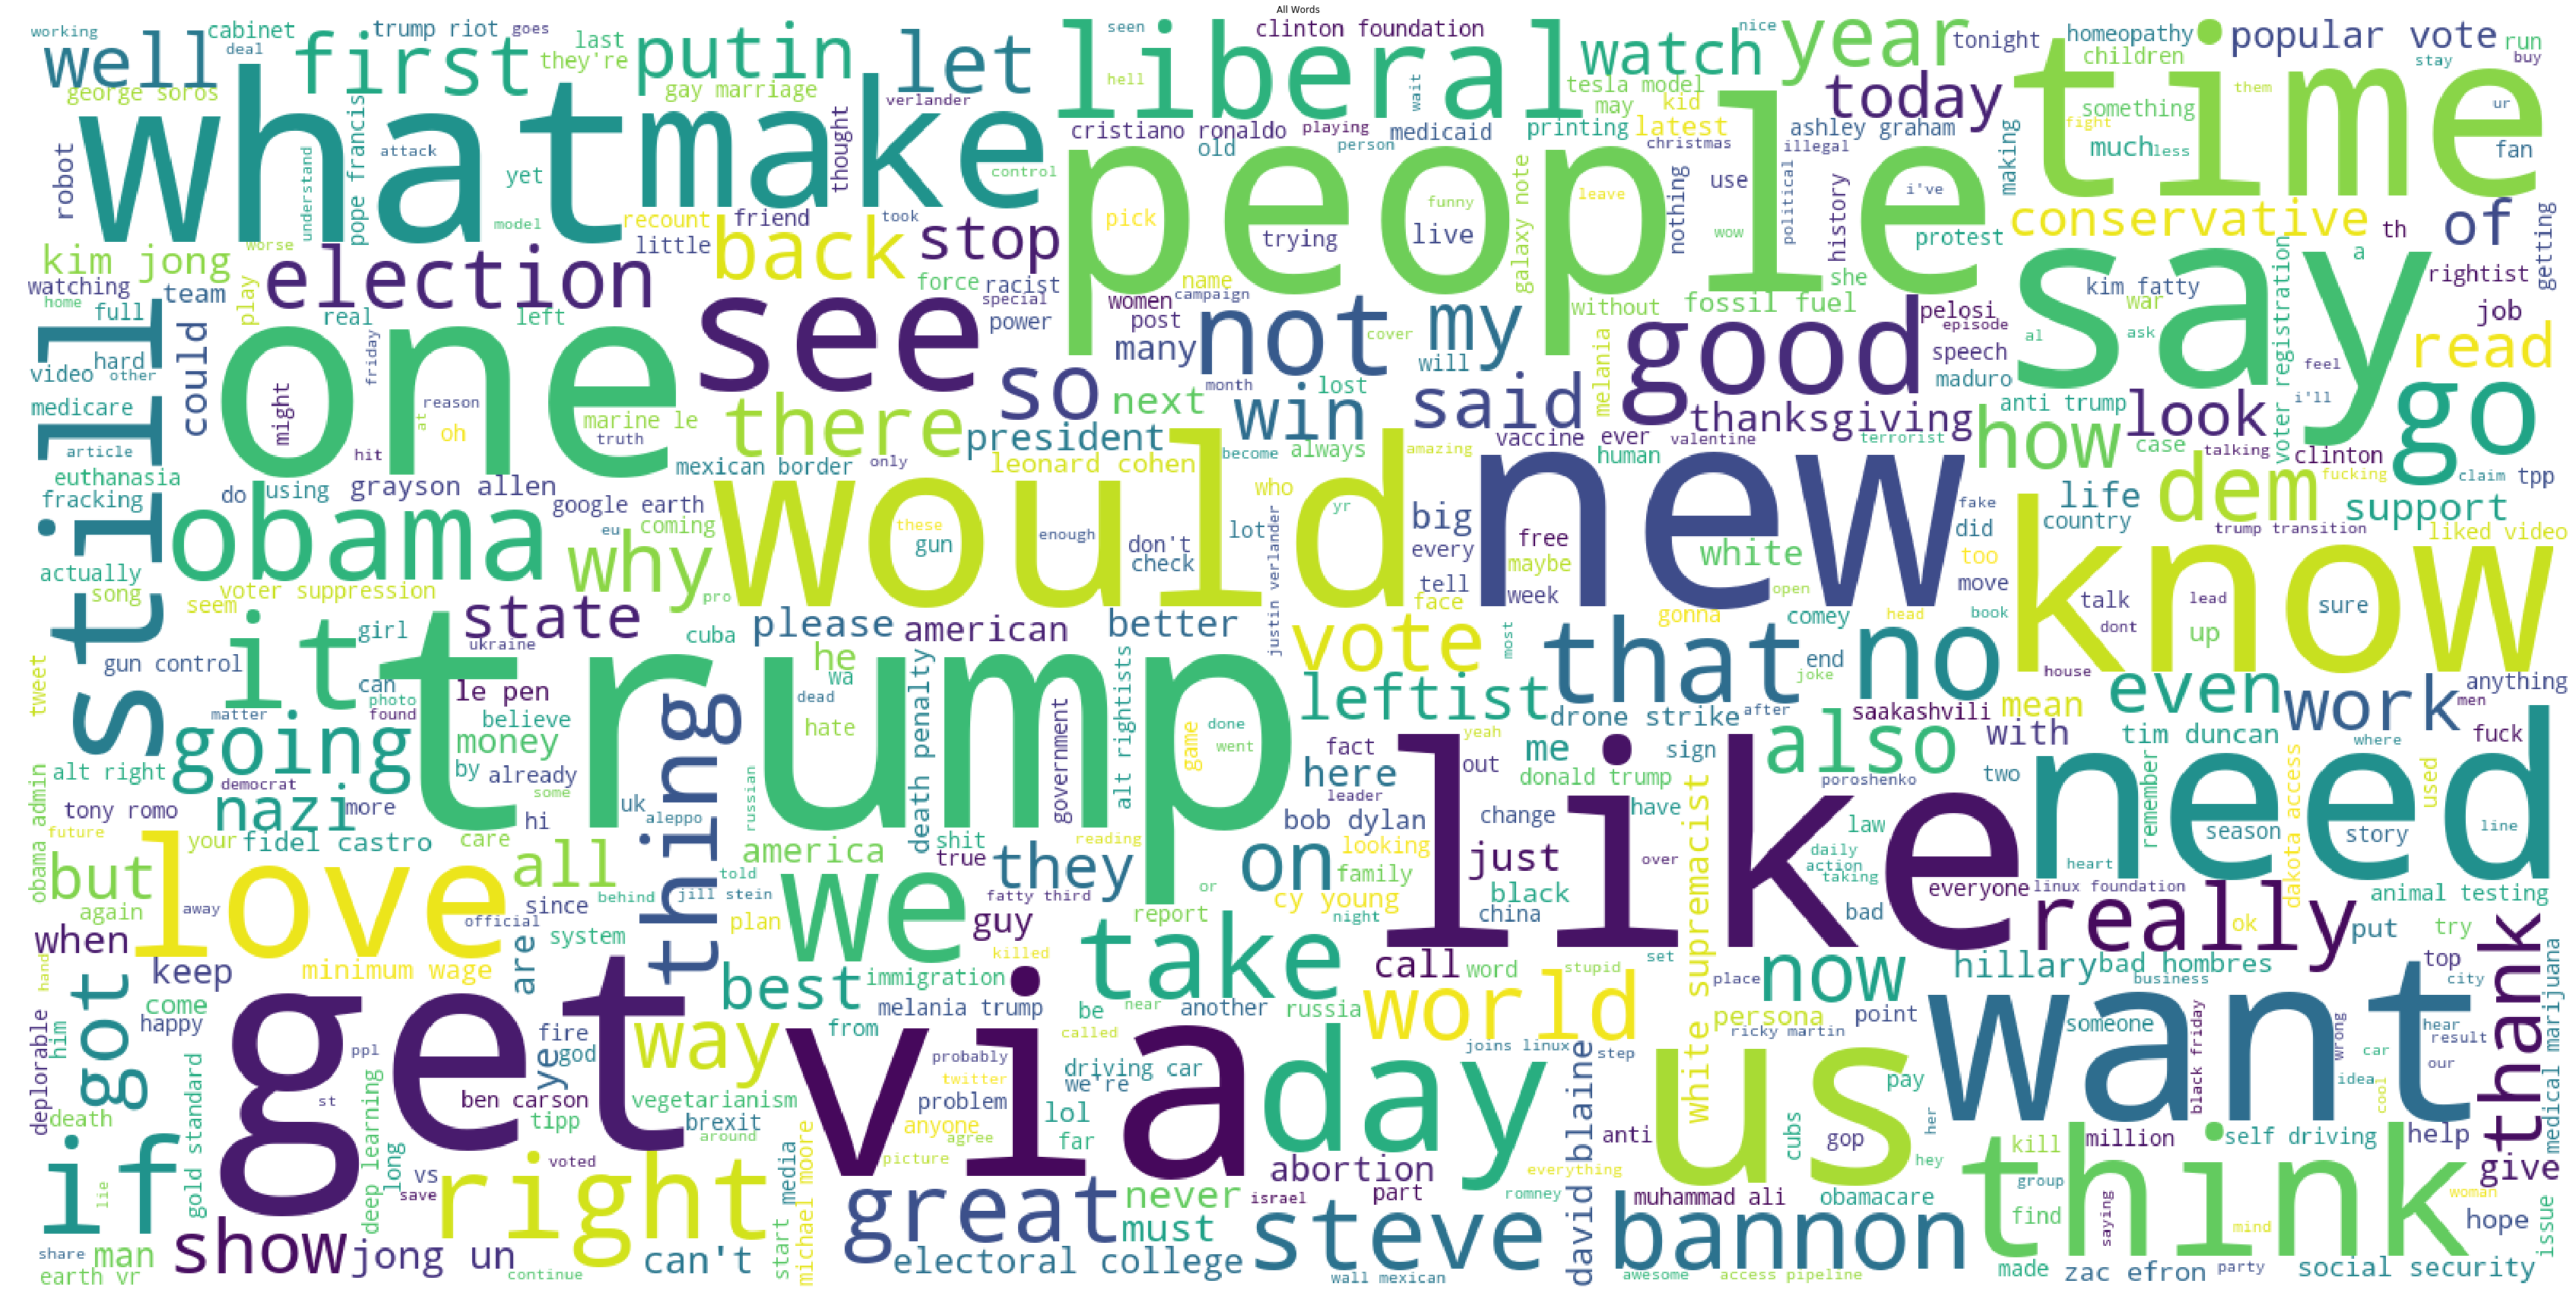

In [71]:
#python -m pip install --user wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

texts = {}
texts = ' '.join(sd['clean'])
stopwords = {'hashtag', 'user', 'number', 'url', '<', '>', 'in', 'is', 'that', 'it', 'and', 'for', 'he', 'i\'m', 'to', 'you', 'this', 'the'}

wordcloud = WordCloud(max_font_size=200, min_font_size=10, max_words=500, stopwords=stopwords, background_color="white", relative_scaling=.4, height=800, width=1600).generate(texts)
plt.figure(figsize=(60,40))
plt.title('All Words')
plt.imshow(wordcloud)
plt.axis('off')
